In [59]:
import yfinance as yf

#Make a DataFrame with yfiannce data

df = yf.download("SPY", period = 'max')
print(df.head())


/var/folders/fj/0v013f390gq6x6cshjlkvj7c0000gn/T/ipykernel_10984/3790888101.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("SPY", period = 'max')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open   Volume
Ticker            SPY        SPY        SPY        SPY      SPY
Date                                                           
1993-01-29  24.380436  24.397776  24.276394  24.397776  1003200
1993-02-01  24.553844  24.553844  24.397782  24.397782   480500
1993-02-02  24.605865  24.623206  24.484483  24.536504   201300
1993-02-03  24.865974  24.883315  24.623210  24.640551   529400
1993-02-04  24.970009  25.022030  24.675224  24.952669   531500


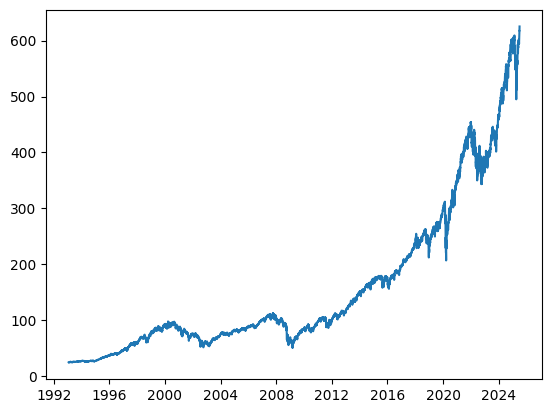

In [60]:
import matplotlib.pyplot as plt

plt.plot(df["Close"])


In [61]:
df["Moving Average"] = df["Close"].rolling(50).mean()

df

Price,Close,High,Low,Open,Volume,Moving Average
Ticker,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,
1993-01-29,24.380436,24.397776,24.276394,24.397776,1003200,NaN
1993-02-01,24.553844,24.553844,24.397782,24.397782,480500,NaN
1993-02-02,24.605865,24.623206,24.484483,24.536504,201300,NaN
1993-02-03,24.865974,24.883315,24.623210,24.640551,529400,NaN
1993-02-04,24.970009,25.022030,24.675224,24.952669,531500,NaN
...,...,...,...,...,...,...
2025-06-27,614.909973,616.390015,610.830017,612.880005,86258400,577.935593
2025-06-30,617.849976,619.219971,615.039978,617.380005,92502500,579.810382


/var/folders/fj/0v013f390gq6x6cshjlkvj7c0000gn/T/ipykernel_10984/1303800539.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, period = 'max')
[*********************100%***********************]  1 of 1 completed


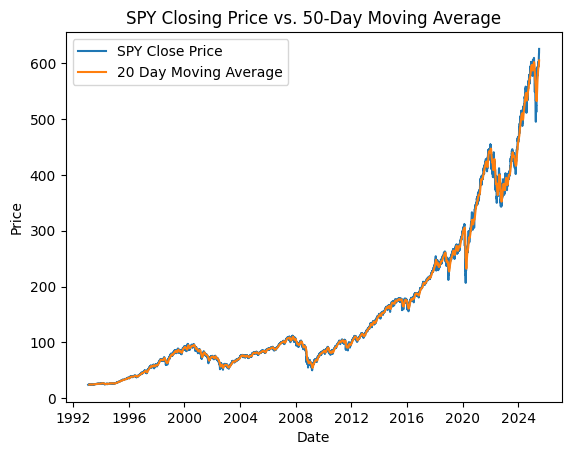

In [62]:
TICKER = 'SPY'
WINDOW = 20


df = yf.download(TICKER, period = 'max')
df["Moving Average"] = df["Close"].rolling(WINDOW).mean()


plt.plot(df["Close"])
plt.plot(df["Moving Average"])
plt.title(f"{TICKER} Closing Price vs. 50-Day Moving Average");
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend([f"{TICKER} Close Price", f"{WINDOW} Day Moving Average"])
plt.show()


In [63]:
import numpy as np

df.columns = df.columns.get_level_values(0)


def add_ma_strategy(df):

    df["Strategy"] = np.where(df["Close"] > df["Moving Average"], 1, -1)

    return df

df = add_ma_strategy(df)

df["Asset_cumulative"] = np.cumprod(1 + df["Close"].pct_change()) - 1
df["Strategy_cumulative"] = np.cumprod(1 + df["Close"].pct_change() * df["Strategy"].shift()) - 1

df

Price,Close,High,Low,Open,Volume,Moving Average,Strategy,Asset_cumulative,Strategy_cumulative
Date,,,,,,,,,
1993-01-29,24.380440,24.397780,24.276398,24.397780,1003200,NaN,-1,NaN,NaN
1993-02-01,24.553852,24.553852,24.397789,24.397789,480500,NaN,-1,0.007113,-0.007113
1993-02-02,24.605856,24.623196,24.484474,24.536495,201300,NaN,-1,0.009246,-0.009216
1993-02-03,24.865978,24.883319,24.623214,24.640554,529400,NaN,-1,0.019915,-0.019690
1993-02-04,24.970018,25.022039,24.675233,24.952678,531500,NaN,-1,0.024182,-0.023791
...,...,...,...,...,...,...,...,...,...
2025-06-27,614.909973,616.390015,610.830017,612.880005,86258400,598.963626,1,24.221447,-0.724684
2025-06-30,617.849976,619.219971,615.039978,617.380005,92502500,600.473486,1,24.342036,-0.723368
2025-07-01,617.650024,618.830017,615.520020,616.359985,70030100,601.807840,1,24.333834,-0.723457


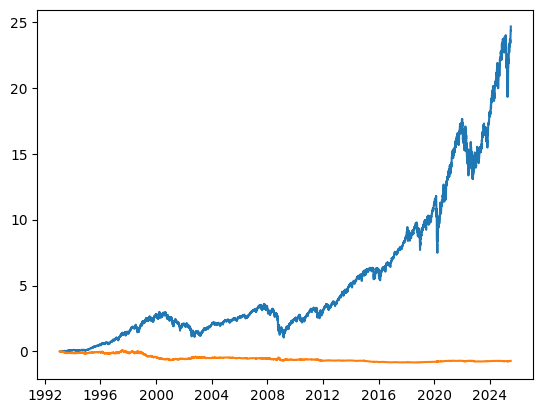

In [64]:
plt.plot(df["Asset_cumulative"])
plt.plot(df["Strategy_cumulative"])

/var/folders/fj/0v013f390gq6x6cshjlkvj7c0000gn/T/ipykernel_10984/1268621604.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, period = 'max')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Moving Average,Strategy,Asset_cumulative,Strategy_cumulative
Date,,,,,,,,,
1993-11-11,26.199986,26.341225,26.182331,26.270605,88900,25.308222,NaN,NaN,NaN
1993-11-12,26.323566,26.411841,26.235292,26.252947,108200,25.317937,1.0,0.004717,0.004717
1993-11-15,26.305922,26.376541,26.235302,26.376541,243300,25.326698,1.0,0.004043,0.004043
1993-11-16,26.429508,26.447163,26.252958,26.358888,492600,25.335816,1.0,0.008760,0.008760
1993-11-17,26.288271,26.447166,26.217651,26.447166,39600,25.342927,1.0,0.003370,0.003370


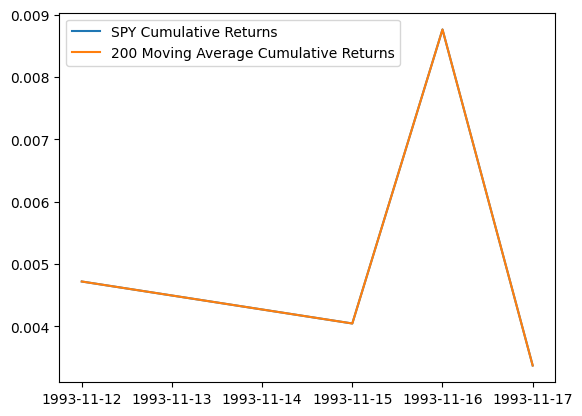

In [ ]:


#Entire Program
TICKER = 'SPY'
WINDOW = 200


def get_data():
    df = yf.download(TICKER, period = 'max')
    df["Moving Average"] = df["Close"].rolling(WINDOW).mean()   
    return df.dropna()  # Drop NaN values after rolling mean calculation

def add_moving_average(df):
    df.columns = df.columns.get_level_values(0)
    df["Strategy"] = np.where(df["Close"] > df["Moving Average"], 1, -1)
    df["Strategy"] = df["Strategy"].shift(1)  # Shift strategy to avoid lookahead bias
    return df

def test_strategy(df):
    df["Asset_cumulative"] = np.cumprod(1 + df["Close"].pct_change()) - 1
    df["Strategy_cumulative"] = np.cumprod(1 + df["Close"].pct_change() * df["Strategy"]) - 1

    # Plotting the results
    plt.plot(df["Asset_cumulative"])
    plt.plot(df["Strategy_cumulative"])
    plt.legend([f"{TICKER} Cumulative Returns", f"{WINDOW} Moving Average Cumulative Returns"])
    return df 


def main():
    df = get_data()
    df = add_moving_average(df)
    df = test_strategy(df)
    return df 

main()

